# Aula 1 | **Primeiros passos em Python**

Hoje vamos:
- Revisar alguns conceitos iniciais
- Explorar dados reais usando Python
- Aprender os primeiros comandos com **Pandas** e **Matplotlib**
- Criar gráficos para responder perguntas

---


## Conceitos básicos

<img src="https://media0.giphy.com/media/v1.Y2lkPTc5MGI3NjExNHBwNDhvMDRoNDlvb2pkYnhtdGt4YXhqaWw1Y2Ixa200M2gxZDcxNiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/109fP7pua6Osgw/giphy.gif" width="300">


### Tipos de dados
`int`, `float`, `str`, `bool`

### Listas

### Estruturas de decisão
`if`, `elif` e `else`

### Loops
`for` e `while`

## 🎧 Explorando dados do Spotify

<img src="https://media0.giphy.com/media/v1.Y2lkPTc5MGI3NjExaWJtNjFxcmJ6YXk4eDAyMXVyc3o3cGF2NGF6czhkaXl1anAzNzU0ciZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/bgDd8eRNi6NK8/giphy.gif" width="300">


Aqui, vamos explorar dados extraídos da conta de um usuário do Spotify para entender um pouco do seu perfil e gosto musical. Trabalharemos com dois datasets:
1. **playlists_tracks**: contém a listagem de todas as suas playlists públicas e as músicas contidas nelas
2. **genres_artists**: contém a listagem de artistas presentes nas playlists e seus gêneros

### Leitura e visão geral dos dados

In [3]:
import pandas as pd

In [4]:
playlists_tracks = pd.read_csv('playlists_tracks')
genres_artists = pd.read_csv('genres_artists')

In [5]:
playlists_tracks_df = pd.read_csv('playlists_tracks')
print(playlists_tracks_df.shape)

(8661, 10)


In [6]:
genres_artists_df = pd.read_csv('genres_artists')
print(genres_artists_df.shape)

(934, 3)


In [7]:
playlists_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8661 entries, 0 to 8660
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          8661 non-null   int64 
 1   playlist_id         8661 non-null   object
 2   playlist_name       8661 non-null   object
 3   track_id            8661 non-null   object
 4   track_name          8659 non-null   object
 5   artist_names        8659 non-null   object
 6   album_name          8659 non-null   object
 7   album_release_date  8661 non-null   object
 8   popularity          8661 non-null   int64 
 9   duration_ms         8661 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 676.8+ KB


In [8]:
playlists_tracks["playlist_name"].value_counts().head(5)

,count
playlist_name,
Caminhando sem padrão nenhum,311
Rockzim pra cantar junto,300
cantando feat. rebolando,274
tudo misturado curtindo uma chuva,261
Radio em '00,241


### Limpeza e transformações

Antes de analisarmos as playlists e os gêneros, vamos preparar nossos dados:
1. Extrair apenas o **ano** da data de lançamento dos álbuns  
2. Remover músicas com **nome ausente**  
3. Transformar a tabela de gêneros para que cada **gênero tenha uma linha própria**

1. Extrair o ano

In [9]:
playlists_tracks['album_release_date_ajustado'] = pd.to_datetime(playlists_tracks['album_release_date'], errors='coerce')

In [10]:
playlists_tracks.columns

Index(['Unnamed: 0', 'playlist_id', 'playlist_name', 'track_id', 'track_name',
       'artist_names', 'album_name', 'album_release_date', 'popularity',
       'duration_ms', 'album_release_date_ajustado'],
      dtype='object')

In [11]:
playlists_tracks['album_release_year'] = playlists_tracks['album_release_date_ajustado'].dt.year
playlists_tracks.head(3)

,Unnamed: 0,playlist_id,playlist_name,track_id,track_name,artist_names,album_name,album_release_date,popularity,duration_ms,album_release_date_ajustado,album_release_year
0,0,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,59WN2psjkt1tyaxjspN8fp,Killing In The Name,Rage Against The Machine,Rage Against The Machine - XX (20th Anniversar...,1992,79,313573,1992-01-01,1992.0
1,1,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,2DlHlPMa4M17kufBvI2lEN,Chop Suey!,System Of A Down,Toxicity,2001-09-04,85,210240,NaT,NaN
2,2,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,3DwQ7AH3xGD9h65ezslm6q,Enter Sandman - Remastered 2021,Metallica,Metallica (Remastered Deluxe Box Set),2021-09-10,83,331560,NaT,NaN


2. Excluir linhas com track_name ausente

In [12]:
playlists_tracks_clean = playlists_tracks.dropna(subset=['track_name']).copy()
playlists_tracks_clean.shape

(8659, 12)

3. Explodir os gêneros (1 linha por artista e gênero)

## Visualização com Matplotlib

<img src="https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExazlycDZvOXZzbXN1Z2djZzZ3cnU0M3FkeXdnbzJxMGdjbmpsZGVseSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/iRIf7MAdvOIbdxK4rR/giphy.gif" width="300">

Agora que os dados estão limpos, vamos responder algumas perguntas com gráficos.

In [13]:
import matplotlib.pyplot as plt

### Quais playlists têm mais músicas?

In [14]:
playlists_counts = playlists_tracks_clean['playlist_name'].value_counts().head(10)
playlists_counts

,count
playlist_name,
Caminhando sem padrão nenhum,311
Rockzim pra cantar junto,300
cantando feat. rebolando,274
tudo misturado curtindo uma chuva,261
Radio em '00,241
VOLTA JUVENTUDE,239
Black power,231
jovem indie,219
Top indie,215


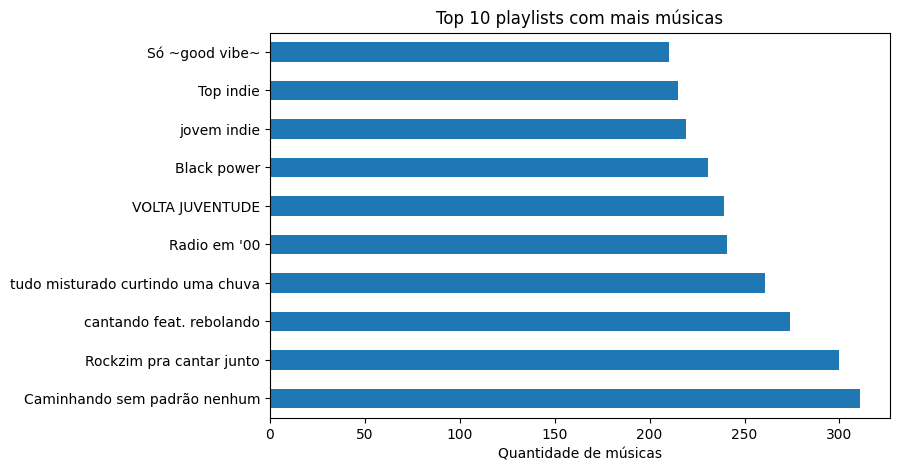

In [15]:
playlists_counts.plot(kind="barh", figsize=(8, 5))

plt.title('Top 10 playlists com mais músicas')
plt.xlabel("Quantidade de músicas")
plt.ylabel("")
plt.show()

### Como evolui a quantidade de músicas lançadas por ano nas playlists?

In [16]:
plt.style.use('seaborn-v0_8')

In [17]:
songs_per_year = (
    playlists_tracks_clean['album_release_date']
    .value_counts()
    .sort_index()
)

songs_per_year

,count
album_release_date,
1957-01-01,3
1957-02-25,2
1957-03,1
1958,1
1960,4
...,...
2025-05-16,1
2025-06-20,2
2025-08-22,3


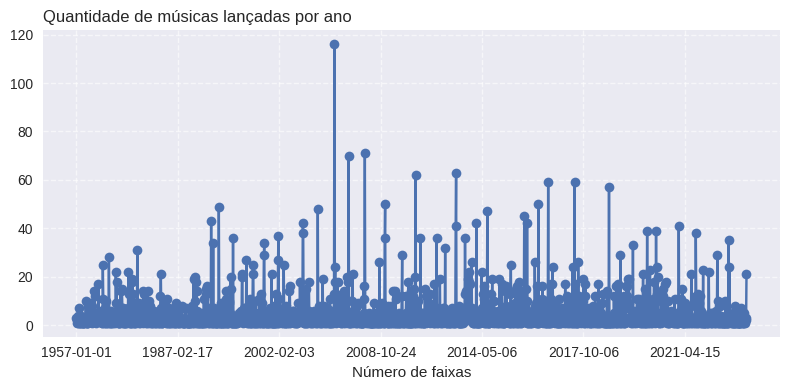

In [18]:
songs_per_year.plot(kind='line', marker='o', figsize=(8, 4))

plt.title('Quantidade de músicas lançadas por ano', loc='left')
plt.xlabel("Número de faixas")
plt.ylabel("")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Quais são os artistas com maior popularidade média?

In [24]:
playlists_tracks_clean.groupby("artist_names")["popularity"] \
    .mean() \
    .sort_values(ascending=False) \
    .head(10)

,popularity
artist_names,
The Neighbourhood,91.000000
"Gorillaz, De La Soul",90.000000
Fleetwood Mac,89.000000
"The Weeknd, Daft Punk",89.000000
"Kendrick Lamar, SZA",89.000000
"Tyler, The Creator, Kali Uchis",89.000000
Bad Bunny,88.333333
sombr,88.000000
"The Chainsmokers, Halsey",86.000000


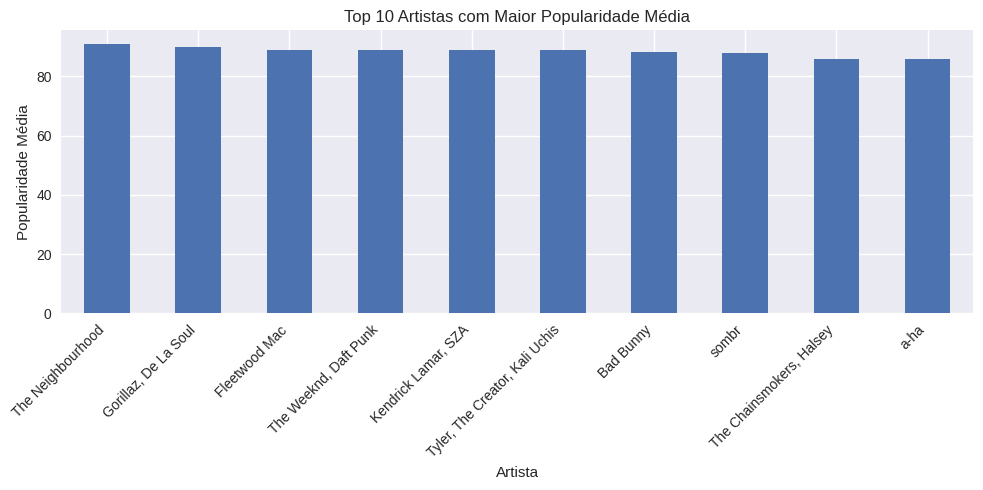

In [26]:
plt.figure(figsize=(10,5))
top10 = playlists_tracks_clean.groupby("artist_names")["popularity"] \
    .mean() \
    .sort_values(ascending=False) \
    .head(10)
top10.plot(kind="bar")

plt.title("Top 10 Artistas com Maior Popularidade Média")
plt.xlabel("Artista")
plt.ylabel("Popularidade Média")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

### Quais são os artistas mais frequentes nas playlists?

In [28]:
top_artistas = (
    playlists_tracks_clean["artist_names"]
    .value_counts()
    .head(10)
)

### Quais gêneros são mais frequentes entre os artistas das playlists?

In [33]:
merged_df = pd.merge(playlists_tracks_clean, genres_artists_df, left_on='artist_names', right_on='artist_name', how='left')

merged_df['genres'] = merged_df['genres'].str.split(',')
genres_exploded = merged_df.explode('genres')

genres_exploded['genres'] = genres_exploded['genres'].str.strip()

genre_counts = genres_exploded['genres'].value_counts().head(10)

print(genre_counts)

genres
mpb                 1027
nova mpb             695
alternative rock     619
rock                 546
samba                511
brazilian rock       429
indie                413
indie rock           400
garage rock          387
bossa nova           365
Name: count, dtype: int64


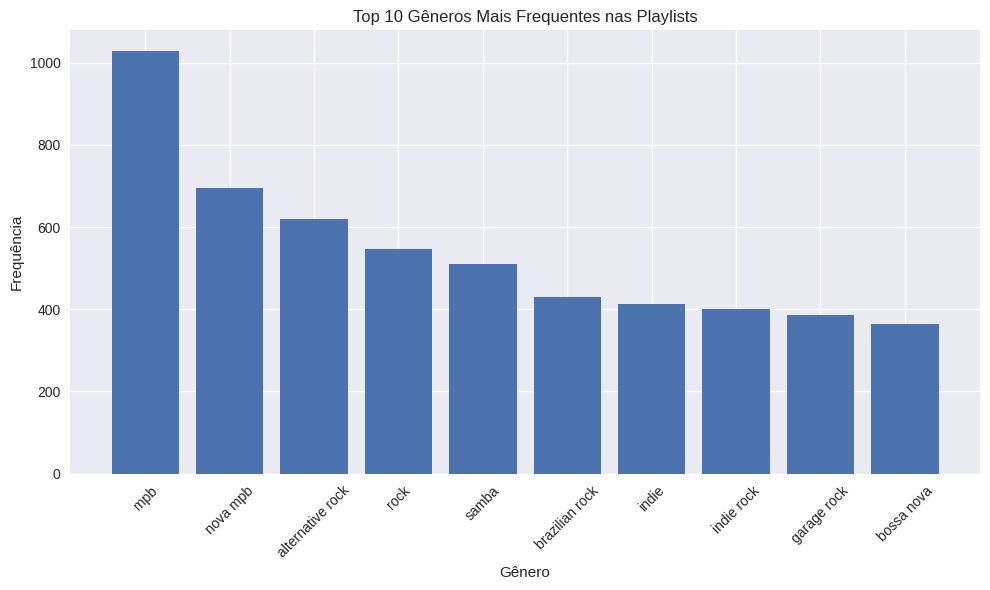

In [34]:
plt.figure(figsize=(10, 6))
plt.bar(genre_counts.index, genre_counts.values)
plt.title("Top 10 Gêneros Mais Frequentes nas Playlists")
plt.xlabel("Gênero")
plt.ylabel("Frequência")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Qual é a duração média das músicas por playlist?

In [45]:
# Agrupar por música e calcular a duração média
song_duration = (
    playlists_tracks_clean.groupby('track_name')['duration_ms']
    .mean()
    .sort_values(ascending=False)
    .head(10)   # Top 10
)

# Converter duração de ms para minutos
song_duration_minutes = song_duration / 60000

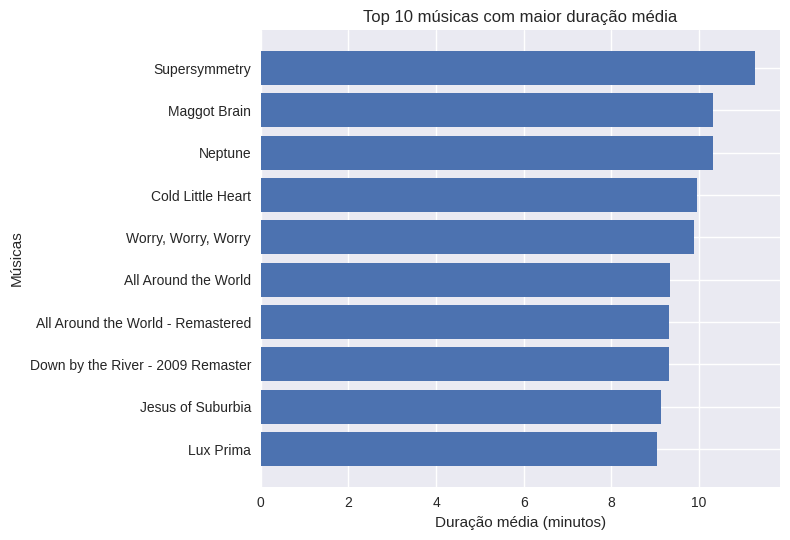

In [48]:
# Gráfico horizontal
plt.barh(song_duration_minutes.index, song_duration_minutes)

plt.xlabel("Duração média (minutos)")
plt.ylabel("Músicas")
plt.title("Top 10 músicas com maior duração média")

# Inverte para a maior música aparecer no topo
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

### Exercício: Existe relação entre o ano de lançamento e a duração média das músicas?

In [52]:
# 1. Extrair apenas o ano da coluna de datas -
playlists_tracks_clean['release_year'] = (
    pd.to_datetime(playlists_tracks_clean['album_release_date'], errors='coerce')
    .dt.year
)

# 2. Agrupar por ano e calcular a duração média (ms)
year_duration = (
    playlists_tracks_clean.groupby('release_year')['duration_ms']
    .mean()
    .dropna()
    .sort_index()
)

# 3. Converter de ms para minutos
year_duration_minutes = year_duration / 60000

/tmp/ipython-input-28706212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playlists_tracks_clean['release_year'] = (


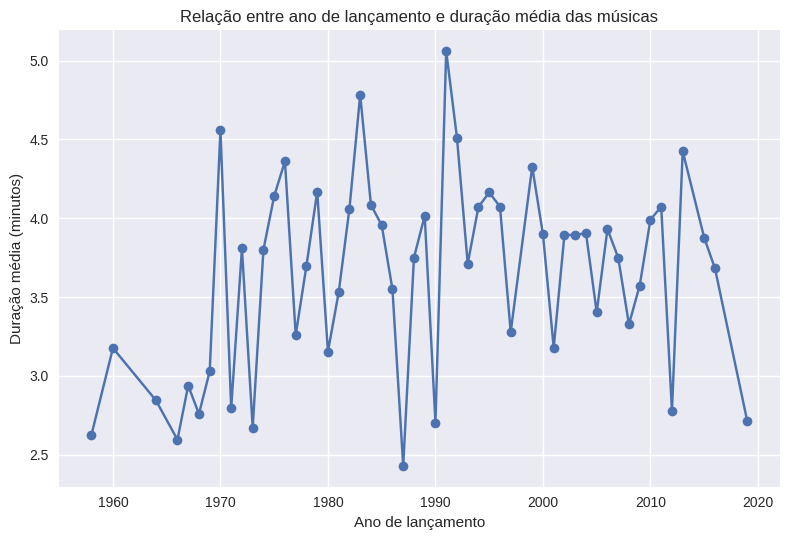

In [53]:
plt.plot(year_duration_minutes.index, year_duration_minutes.values, marker='o')

plt.xlabel("Ano de lançamento")
plt.ylabel("Duração média (minutos)")
plt.title("Relação entre ano de lançamento e duração média das músicas")
plt.grid(True)

plt.tight_layout()
plt.show()

### Exercício: Quão diversa em gêneros é cada playlist?
Em outras palavras, quais playlists têm mais gêneros distintos entre os artistas que aparecem nelas?

In [54]:
# 1. Juntar playlists + artistas + gêneros
merged = pd.merge(
    playlists_tracks_clean,
    genres_artists_df,
    left_on='artist_names',
    right_on='artist_name',
    how='left'
)

# 2. Transformar a coluna de gêneros em lista
merged['genres'] = merged['genres'].str.split(',')

# 3. Explodir gêneros (1 linha por gênero)
genres_exploded = merged.explode('genres')

# 4. Limpar espaços extras
genres_exploded['genres'] = genres_exploded['genres'].str.strip()

# 5. Contar quantos gêneros distintos existem por playlist
genre_diversity = (
    genres_exploded.groupby('playlist_name')['genres']
    .nunique()
    .sort_values(ascending=False)
)

print("Top playlists mais diversas:")
print(genre_diversity.head(10))

Top playlists mais diversas:
playlist_name
Caminhando sem padrão nenhum         81
Toda zoë kravitz energy              79
Aquela jantinha                      62
Os classicão tudo                    58
Bom dia minha esquerdista            57
Cervejinha suave                     53
Só ~good vibe~                       52
tudo misturado curtindo uma chuva    49
serotonina pra trabalhar             49
Rockzim pra cantar junto             48
Name: genres, dtype: int64


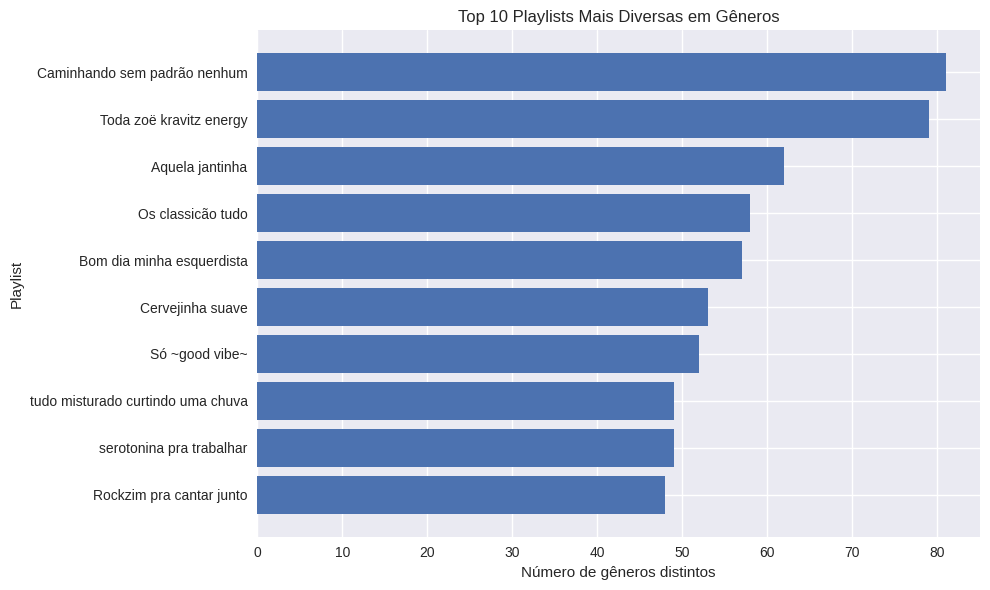

In [55]:
# Selecionar apenas o top 10
top10 = genre_diversity.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top10.index, top10.values)
plt.xlabel("Número de gêneros distintos")
plt.ylabel("Playlist")
plt.title("Top 10 Playlists Mais Diversas em Gêneros")
plt.gca().invert_yaxis()  # coloca o maior no topo
plt.tight_layout()
plt.show()

---

<img src="https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExMmxwajYzcWh3NmRhNjN0N2plMDV5ZGdrcHQ0ZnlqeW55bTd6NjdnYSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/lD76yTC5zxZPG/giphy.gif" width="300">